In [ ]:
# Nio


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import math
import pandas as pd

import statsmodels as sm
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams


In [ ]:
import yfinance as yf


data1 = yf.download('TSLA', start="2019-11-01", end="2022-10-30")
data2 = yf.download('NIO', start="2019-11-01", end="2022-10-30")
data3 = yf.download('TWTR', start="2019-11-01", end="2022-10-30")
data4 = yf.download('Meta', start="2019-11-01", end="2022-10-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:

df2 = pd.DataFrame(data2)




In [ ]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,1.49,1.55,1.49,1.52,1.52,17957200
2019-11-04,1.65,1.90,1.58,1.71,1.71,61083000
2019-11-05,1.88,2.38,1.80,2.34,2.34,183556700
2019-11-06,2.46,2.46,1.96,2.03,2.03,113933700
2019-11-07,2.11,2.20,2.05,2.07,2.07,39411800


In [ ]:
#df1['Date'] = df1.index
#df2['Date'] = df2.index
#df3['Date'] = df3.index
#df4['Date'] = df4.index


In [ ]:
df2.index

DatetimeIndex(['2019-11-01', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07', '2019-11-08', '2019-11-11', '2019-11-12',
               '2019-11-13', '2019-11-14',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=754, freq=None)

In [ ]:
ts2 = df2['Close']

ts2.isnull().sum()

0

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

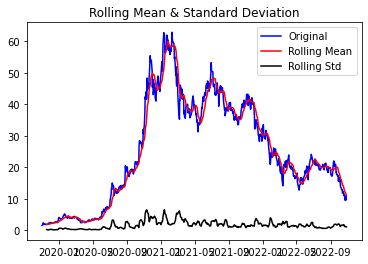

Results of Dickey-Fuller Test:
Test Statistic                  -1.440820
p-value                          0.562558
#Lags Used                       7.000000
Number of Observations Used    746.000000
Critical Value (1%)             -3.439146
Critical Value (5%)             -2.865422
Critical Value (10%)            -2.568837
dtype: float64


In [ ]:

test_stationarity(ts2)


In [ ]:
# Double log

ts2_log = np.log(ts2)
ts2_2ndlog = np.log(ts2_log)

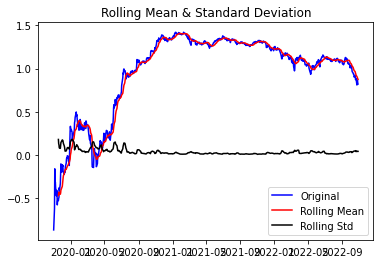

Results of Dickey-Fuller Test:
Test Statistic                  -3.042319
p-value                          0.031127
#Lags Used                      16.000000
Number of Observations Used    737.000000
Critical Value (1%)             -3.439254
Critical Value (5%)             -2.865470
Critical Value (10%)            -2.568863
dtype: float64


In [ ]:
test_stationarity(ts2_2ndlog)

In [ ]:
 # The acquisition of Twitter by Elon Musk began on April 14, 2022



In [ ]:
print((ts2_2ndlog== 0).sum())
print(ts2_2ndlog.isnull().sum())

0
0


In [1]:


import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


X = ts2_2ndlog

train, test = X[:'2022-04-13'], X['2022-04-14':]



def evaluate_arima_model(arima_order):    
	# prepare training dataset
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


NameError: ignored

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))


In [ ]:
###########Dont Run again#############################
###########Ran Already################################
######################################################
import warnings 

import datetime
print(datetime.datetime.now())

p_values = [1,2,3,4,5]
q_values = [1,2,3,4]
d_values = [0,1]

warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)
print(datetime.datetime.now())

2022-11-13 08:35:08.479942
ARIMA(1, 0, 1) MSE=0.000
ARIMA(1, 0, 2) MSE=0.000
ARIMA(1, 0, 3) MSE=0.000
ARIMA(1, 0, 4) MSE=0.000
ARIMA(1, 1, 1) MSE=0.000
ARIMA(1, 1, 2) MSE=0.000
ARIMA(1, 1, 3) MSE=0.000
ARIMA(1, 1, 4) MSE=0.000
ARIMA(2, 0, 1) MSE=0.000
ARIMA(2, 0, 2) MSE=0.000
ARIMA(2, 0, 3) MSE=0.000
ARIMA(2, 0, 4) MSE=0.000
ARIMA(2, 1, 1) MSE=0.000
ARIMA(2, 1, 2) MSE=0.000
ARIMA(2, 1, 3) MSE=0.000
ARIMA(2, 1, 4) MSE=0.000
ARIMA(3, 0, 1) MSE=0.000
ARIMA(3, 0, 2) MSE=0.000
ARIMA(3, 0, 3) MSE=0.000
ARIMA(3, 0, 4) MSE=0.000
ARIMA(3, 1, 1) MSE=0.000
ARIMA(3, 1, 2) MSE=0.000
ARIMA(3, 1, 3) MSE=0.000
ARIMA(3, 1, 4) MSE=0.000
ARIMA(4, 0, 1) MSE=0.000
ARIMA(4, 0, 2) MSE=0.000
ARIMA(4, 0, 3) MSE=0.000
ARIMA(4, 0, 4) MSE=0.000
ARIMA(4, 1, 1) MSE=0.000
ARIMA(4, 1, 2) MSE=0.000
ARIMA(4, 1, 3) MSE=0.000
ARIMA(4, 1, 4) MSE=0.000
ARIMA(5, 0, 1) MSE=0.000
ARIMA(5, 0, 2) MSE=0.000
ARIMA(5, 0, 3) MSE=0.000
ARIMA(5, 0, 4) MSE=0.000
ARIMA(5, 1, 1) MSE=0.000
ARIMA(5, 1, 2) MSE=0.000
ARIMA(5, 1, 3) MSE=0.00

In [ ]:
#AR Model

from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [ ]:

history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(5,0,3))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)


from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=1.106257, expected=1.091278
predicted=1.088887, expected=1.082939
predicted=1.082377, expected=1.095010
predicted=1.093372, expected=1.064252
predicted=1.058170, expected=1.044507
predicted=1.042692, expected=1.045122
predicted=1.043066, expected=1.047770
predicted=1.047006, expected=1.027775
predicted=1.026166, expected=1.036380
predicted=1.039798, expected=1.039954
predicted=1.040492, expected=1.035107
predicted=1.037489, expected=1.051591
predicted=1.054534, expected=1.052189
predicted=1.052022, expected=1.063872
predicted=1.065442, expected=1.005425
predicted=0.998377, expected=0.994252
predicted=0.996808, expected=0.957965
predicted=0.952398, expected=0.954832
predicted=0.958389, expected=0.933104
predicted=0.931306, expected=0.944922
predicted=0.950871, expected=0.978686
predicted=0.982651, expected=0.984918
predicted=0.986589, expected=1.033614
predicted=1.038641, expected=1.015921
predicted=1.009821, expected=1.034255
predicted=1.033785, expected=1.029518
predicted=1.

In [ ]:
print(len(test))
print(len(train))
print(len(history))
print(len(predictions))

137
617
754
137


In [ ]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(np.exp(test)), np.exp(np.exp(predictions))))
print('Mean Squarred Error: %.2f'% rms)

print('Mean : %.2f'%(np.exp(np.exp(test))).mean())


#First we check the mean value of the data set which comes out to be 17.98
#And the root mean squared error for this particular model should come to around 0.92. 
#Also you should care about is that your root mean squared should be very smaller than the mean value of test set. 
#In this case we can see the average error is gonna be roughly 0.92/17.98 *100 = 5.12% of the actual value.

Mean Squarred Error: 0.92
Mean : 17.98


In [ ]:
start = len(train)
end = len(train)+len(test)-1


prediction_model = pd.DataFrame(model_fit.predict(start=start,end=end,typ='levels'))

prediction_model.index=X.index[start:end+1]

np.exp(np.exp(prediction_model))

,0
Date,
2022-04-14,20.518680
2022-04-18,19.488725
2022-04-19,19.106900
2022-04-20,19.738418
2022-04-21,17.833407
...,...
2022-10-24,11.262278
2022-10-25,9.397090
2022-10-26,10.901903


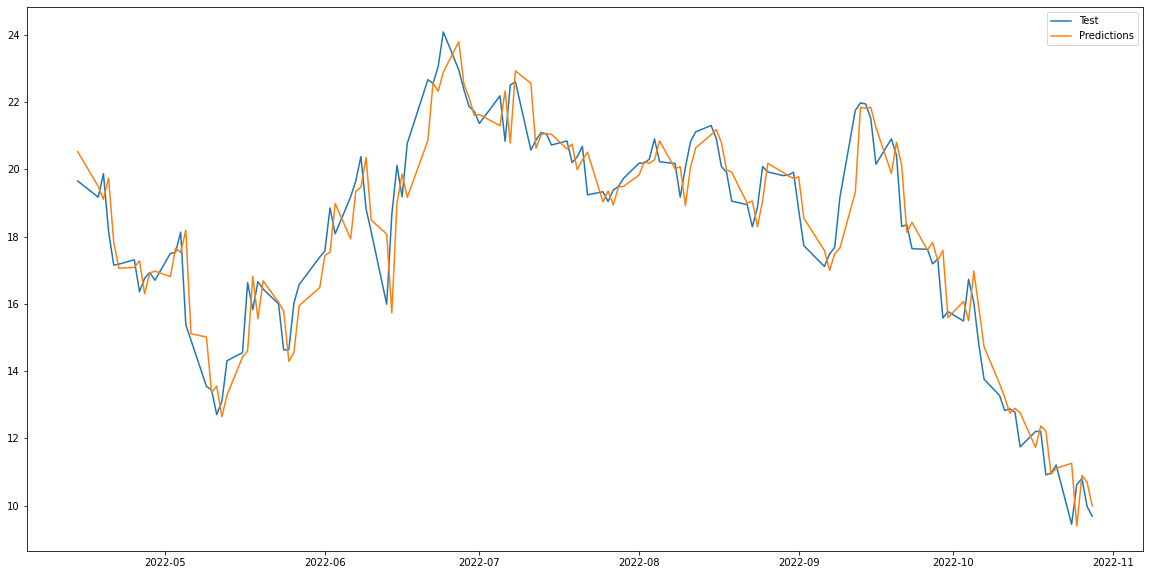

In [ ]:
plt.figure(figsize=(20,10))
#plt.plot(train, label='Training')
plt.plot(np.exp(np.exp(test)), label='Test')
plt.plot(np.exp(np.exp(prediction_model)), label='Predictions')
plt.legend(loc = 'Left corner')
plt.show()

                   0
2022-10-28  9.997519
2022-10-29  9.995632
2022-10-30  9.955742
2022-10-31  9.915394
2022-11-01  9.863902
2022-11-02  9.814686
2022-11-03  9.770437
2022-11-04  9.737051
2022-11-05  9.716592
2022-11-06  9.709823
2022-11-07  9.715034
2022-11-08  9.728903
2022-11-09  9.746843
2022-11-10  9.763833
2022-11-11  9.775193
2022-11-12  9.777343
2022-11-13  9.768359
2022-11-14  9.748225
2022-11-15  9.718748
2022-11-16  9.683154
2022-11-17  9.645472
2022-11-18  9.609825
2022-11-19  9.579776
2022-11-20  9.557811
2022-11-21  9.545030
2022-11-22  9.541059
2022-11-23  9.544183
2022-11-24  9.551663
2022-11-25  9.560202
2022-11-26  9.566475
2022-11-27  9.567667
2022-11-28  9.561909
2022-11-29  9.548545
2022-11-30  9.528186


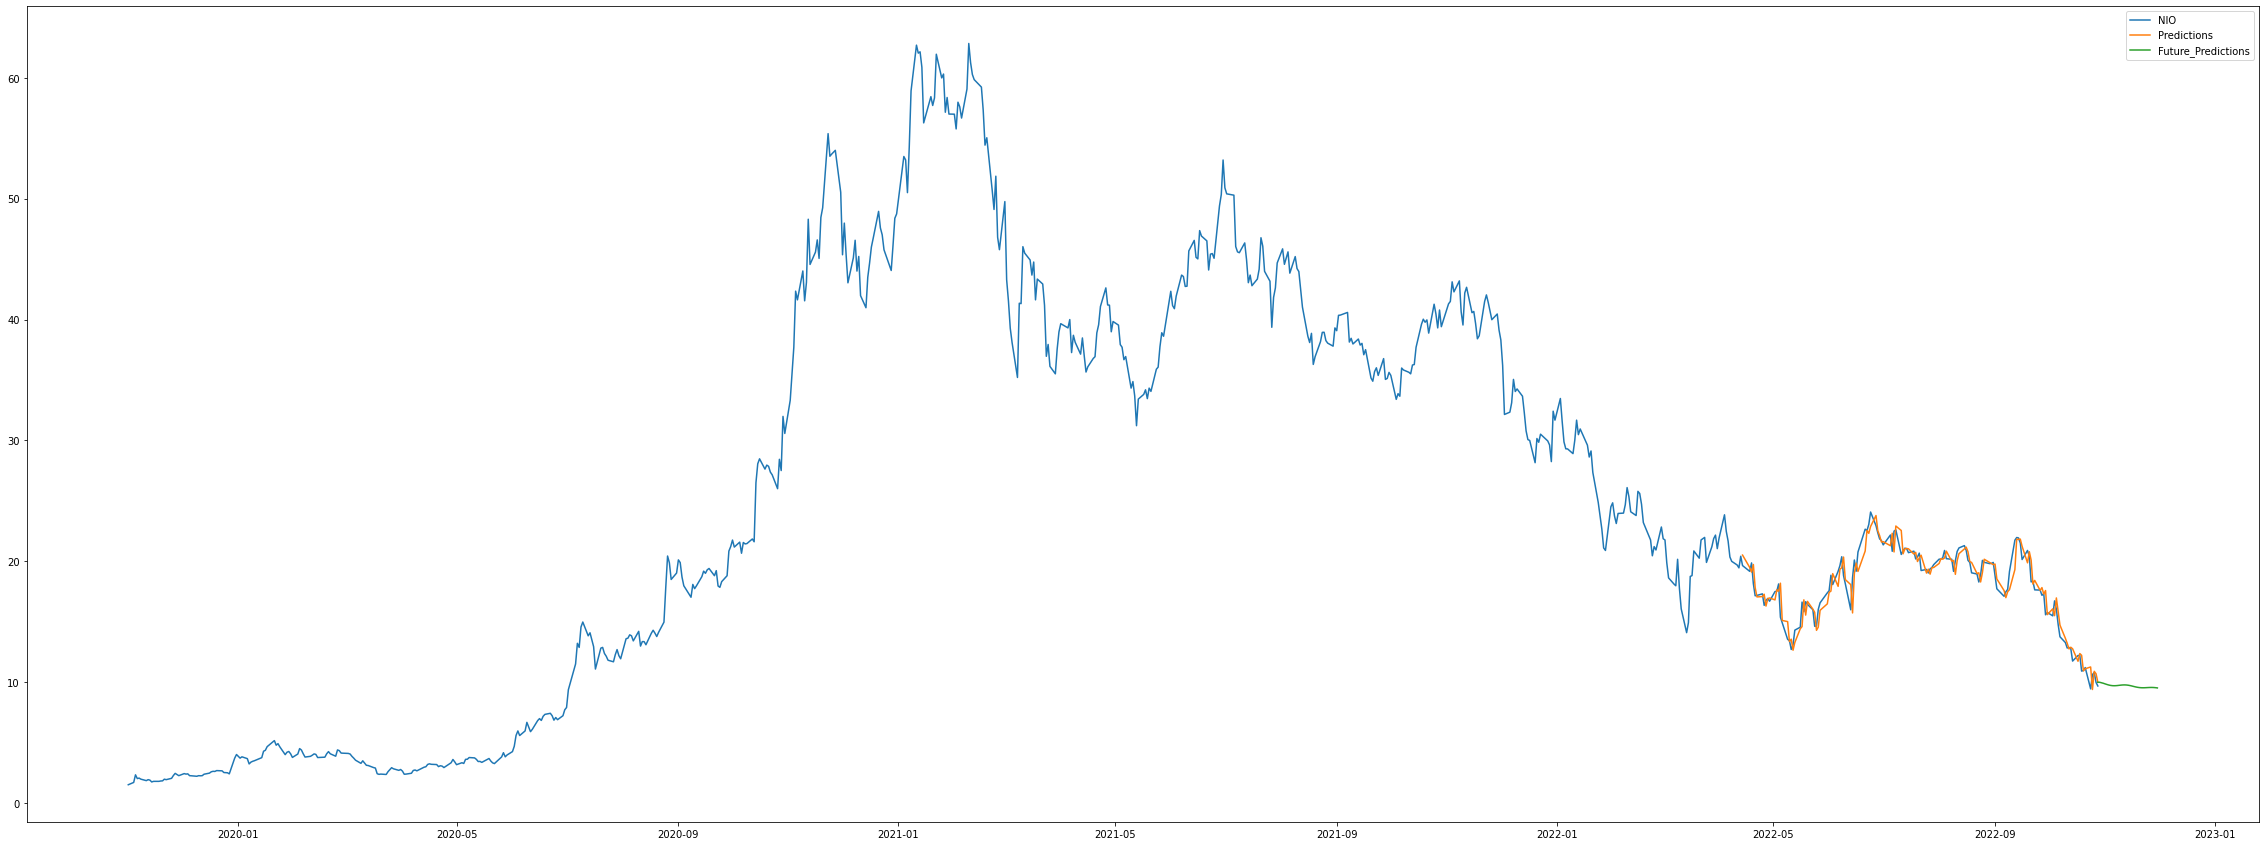

In [ ]:
index_future_dates=pd.date_range(start='2022-10-28',end='2022-11-30')


future_prediction_model = pd.DataFrame(model_fit.predict(start=len(X),end=len(X)+32,typ='levels'))

future_prediction_model.index = index_future_dates

print(np.exp(np.exp(future_prediction_model)))

plt.figure(figsize=(40,15))

plt.plot(ts2,label = 'NIO') 


plt.plot(np.exp(np.exp(prediction_model)), label='Predictions')

plt.plot(np.exp(np.exp(future_prediction_model)), label='Future_Predictions')



plt.legend(loc = 'Left corner')
plt.show()
